<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Size & Sampling

In [1]:
#| echo: false
#| output: asis
show_doc(Resample)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L19){target="_blank" style="float:right; font-size:smaller"}

### Resample

>      Resample (sampling, **kwargs)

*A subclass of Spacing that handles image resampling based on specified sampling factors or voxel dimensions.

The [`Resample`](https://deepCLEM.github.io/bioMONAI/transforms.html#resample) class inherits from `Spacing` and provides a flexible way to adjust the spacing (voxel size) of images by specifying either a sampling factor or explicitly providing new voxel dimensions.*

|    | **Details** |
| -- | ----------- |
| sampling | Sampling factor for isotropic resampling |
| kwargs |  |

In [ ]:
from bioMONAI.core import cells3d, img2Tensor
from bioMONAI.visualize import visualize_slices

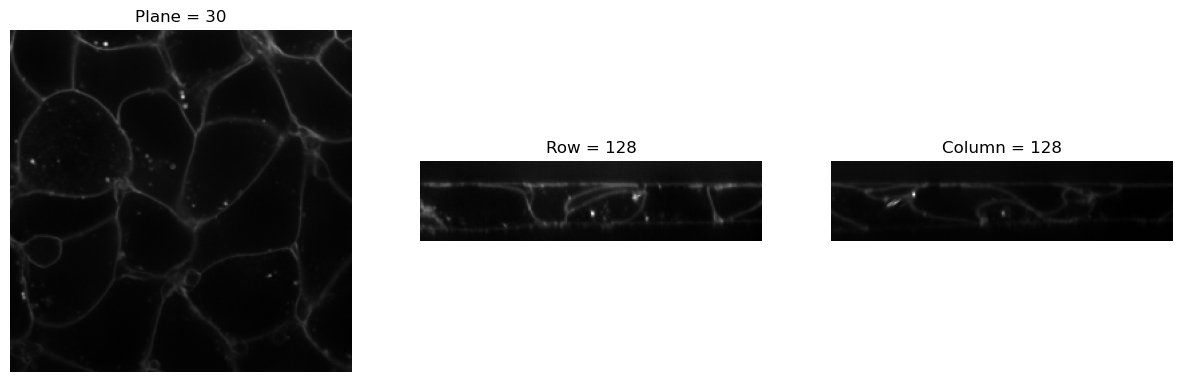

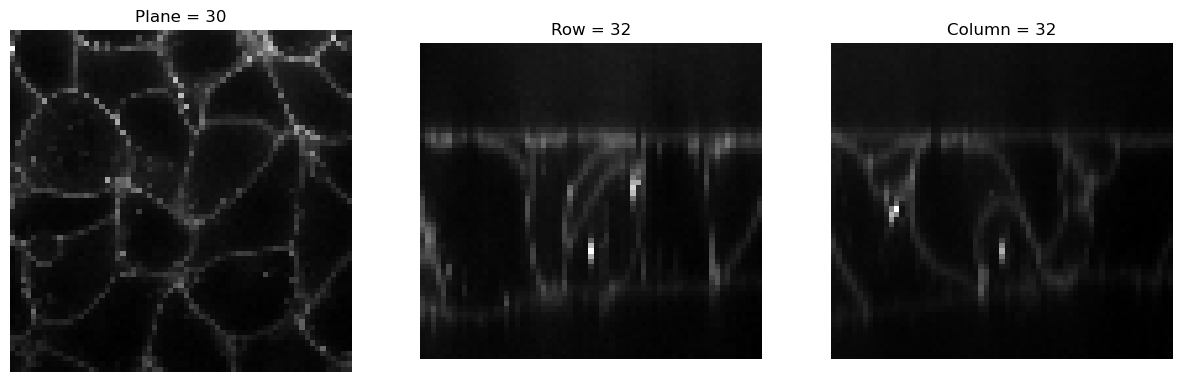

In [ ]:
img = BioImageStack(img2Tensor(cells3d()[:,0]))
visualize_slices(img, showlines=False)

img2 = Resample(4)(img)
visualize_slices(img2, showlines=False)

In [2]:
#| echo: false
#| output: asis
show_doc(Resize)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L48){target="_blank" style="float:right; font-size:smaller"}

### Resize

>      Resize (size=None, **kwargs)

*A subclass of Reshape that handles image resizing based on specified target dimensions.

The [`Resize`](https://deepCLEM.github.io/bioMONAI/transforms.html#resize) class inherits from `Reshape` and provides a flexible way to adjust the size of images by specifying either a target size or scaling factors.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| size | NoneType | None | Target dimensions for resizing (height, width). If its length is smaller than the spatial dimensions, values will be repeated. If an int is provided, it will be broadcast to all spatial dimensions. |
| kwargs |  |  |  |

torch.Size([60, 256, 256])


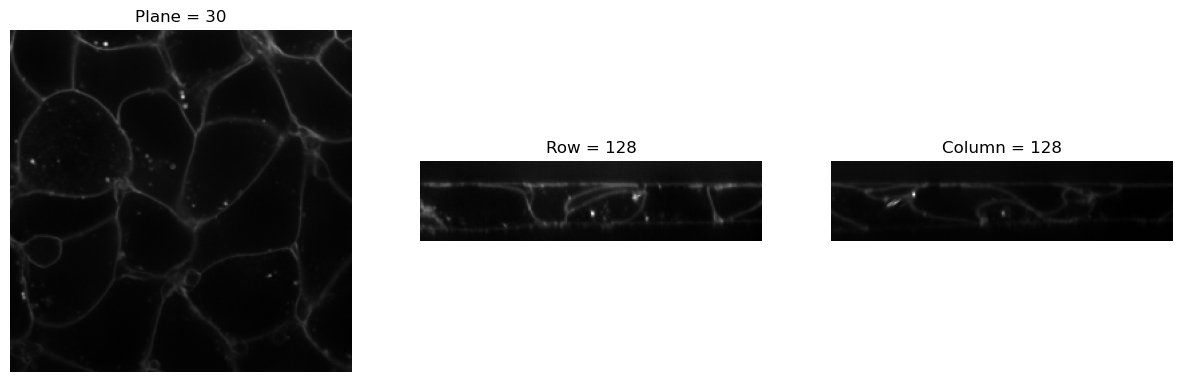

torch.Size([60, 50, 50])


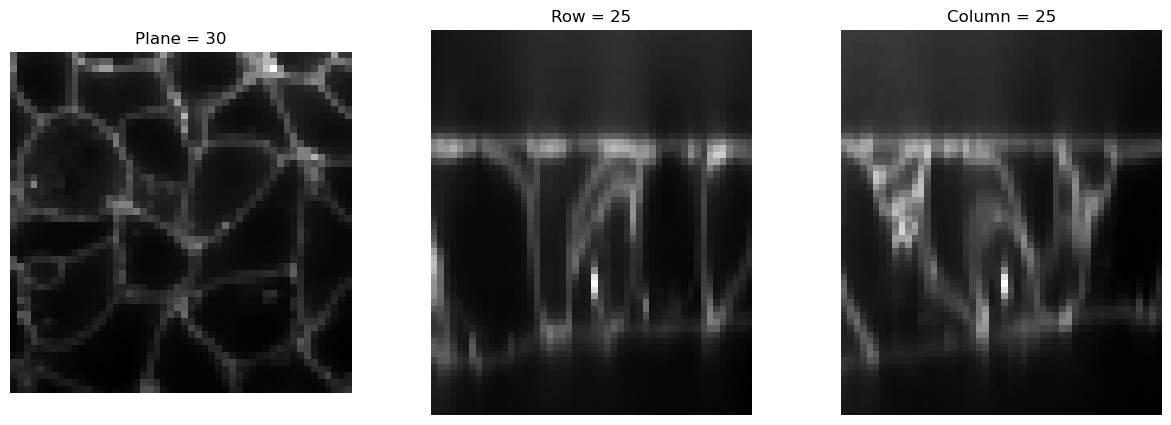

In [ ]:
print(img.size())
visualize_slices(img, showlines=False)

img2 = Resize(50)(img)
print(img2.size())
visualize_slices(img2, showlines=False)

## Noise

In [3]:
#| echo: false
#| output: asis
show_doc(RandCameraNoise)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L103){target="_blank" style="float:right; font-size:smaller"}

### RandCameraNoise

>      RandCameraNoise (p:float=1.0, damp=0.01, qe=0.7, gain=2, offset=100,
>                       exp_time=0.1, dark_current=0.6, readout=1.5,
>                       bitdepth=16, seed=42, simulation=False, camera='cmos',
>                       gain_variance=0.1, offset_variance=5)

*Simulates camera noise by adding Poisson shot noise, dark current noise, and optionally CMOS fixed pattern noise.

Returns:
    numpy.ndarray: The noisy image as a NumPy array with dimensions of input_image.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| p | float | 1.0 | Probability of applying Transform |
| damp | float | 0.01 | Dampening factor to prevent saturation when adding noise |
| qe | float | 0.7 | Quantum efficiency of the camera (0 to 1). |
| gain | int | 2 | Camera gain factor. If an array, it should be broadcastable with input_image shape. |
| offset | int | 100 | Camera offset in ADU. If an array, it should be broadcastable with input_image shape. |
| exp_time | float | 0.1 | Exposure time in seconds. |
| dark_current | float | 0.6 | Dark current per pixel in electrons/second. |
| readout | float | 1.5 | Readout noise standard deviation in electrons. |
| bitdepth | int | 16 | Bit depth of the camera output. |
| seed | int | 42 | Seed for random number generator for reproducibility. |
| simulation | bool | False | If True, assumes input_image is already in units of photons and does not convert from electrons. |
| camera | str | cmos | Specifies the type of camera ('cmos' or any other). Used to add CMOS fixed pattern noise if 'cmos' is specified. |
| gain_variance | float | 0.1 | Variance for the gain noise in CMOS cameras. Only applicable if camera type is 'cmos'. |
| offset_variance | int | 5 | Variance for the offset noise in CMOS cameras. Only applicable if camera type is 'cmos'. |

In [ ]:
from bioMONAI.visualize import plot_image

In [ ]:
img3 = img[30]

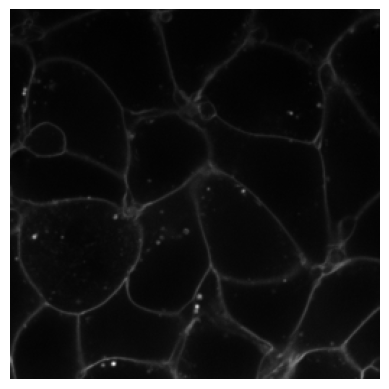

In [ ]:
# Original clean image
plot_image(img3)

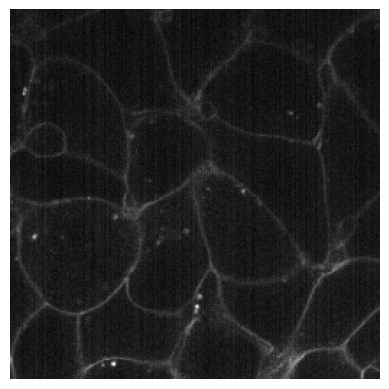

In [ ]:
# Noisy image simulating a CMOS camera
plot_image(RandCameraNoise(camera = 'cmos').encodes(img3))

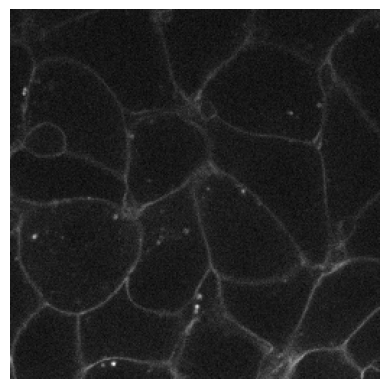

In [ ]:
# Noisy image simulating a CCD camera
plot_image(RandCameraNoise(camera = 'ccd', readout=2).encodes(img3))

## Normalization

In [4]:
#| echo: false
#| output: asis
show_doc(ScaleIntensity)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L189){target="_blank" style="float:right; font-size:smaller"}

### ScaleIntensity

>      ScaleIntensity (x, min=0.0, max=1.0, axis=None, eps=1e-20, dtype=<class
>                      'numpy.float32'>)

*Image normalization.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| x |  |  | The input image to scale. |
| min | float | 0.0 | The minimum intensity value. |
| max | float | 1.0 | The maximum intensity value. |
| axis | NoneType | None | The axis or axes along which to compute the minimum and maximum values. |
| eps | float | 1e-20 | A small value to prevent division by zero. |
| dtype | type | float32 | The data type to use for the output image. |

In [5]:
#| echo: false
#| output: asis
show_doc(ScaleIntensityPercentiles)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L208){target="_blank" style="float:right; font-size:smaller"}

### ScaleIntensityPercentiles

>      ScaleIntensityPercentiles (x, pmin=3, pmax=99.8, axis=None, clip=True,
>                                 b_min=0.0, b_max=1.0, eps=1e-20, dtype=<class
>                                 'numpy.float32'>)

*Percentile-based image normalization.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| x |  |  | The input image to scale. |
| pmin | int | 3 | The minimum percentile value. |
| pmax | float | 99.8 | The maximum percentile value. |
| axis | NoneType | None | The axis or axes along which to compute the minimum and maximum values. |
| clip | bool | True | If True, clips the output values to the specified range. |
| b_min | float | 0.0 | The minimum intensity value. |
| b_max | float | 1.0 | The maximum intensity value. |
| eps | float | 1e-20 | A small value to prevent division by zero. |
| dtype | type | float32 | The data type to use for the output image. |

In [6]:
#| echo: false
#| output: asis
show_doc(ScaleIntensityVariance)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L232){target="_blank" style="float:right; font-size:smaller"}

### ScaleIntensityVariance

>      ScaleIntensityVariance (target_variance=1.0, ndim=2)

*Scales the intensity variance of an ND image to a target value.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| target_variance | float | 1.0 | The desired variance for the scaled intensities. |
| ndim | int | 2 | Number of spatial dimensions in the image. |

In [ ]:
# Example usage with a random tensor of shape (1, 3, 256, 256)
rand_tensor = BioImageBase(torch.rand(1, 3, 256, 256))

transform = ScaleIntensityVariance(ndim=4)

# Apply the transform to the tensor
scaled_tensor = transform(rand_tensor)

print('Original Tensor Variance:', rand_tensor.var().item())
print('Scaled Tensor Variance:', scaled_tensor.var().item())

Original Tensor Variance: 0.08352072536945343
Scaled Tensor Variance: 0.9999999403953552


## Data Augmentation

In [7]:
#| echo: false
#| output: asis
show_doc(RandCrop2D)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L271){target="_blank" style="float:right; font-size:smaller"}

### RandCrop2D

>      RandCrop2D (size:int|tuple, lazy=False, **kwargs)

*Randomly crop an image to `size`*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| size | int \| tuple |  | Size to crop to, duplicated if one value is specified |
| lazy | bool | False | a flag to indicate whether this transform should execute lazily or not. Defaults to False |
| kwargs |  |  |  |

In [8]:
#| echo: false
#| output: asis
show_doc(RandCropND)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L302){target="_blank" style="float:right; font-size:smaller"}

### RandCropND

>      RandCropND (size:int|tuple, lazy=False, **kwargs)

*Randomly crops an ND image to a specified size.

This transform randomly crops an ND image to a specified size during training and performs
a center crop during validation. It supports both 2D and 3D images and videos, assuming
the first dimension is the batch dimension.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| size | int \| tuple |  | Size to crop to, duplicated if one value is specified |
| lazy | bool | False | a flag to indicate whether this transform should execute lazily or not. Defaults to False |
| kwargs |  |  |  |

In [ ]:
# Define a random tensor
orig_size = (65, 65)
rand_tensor = BioImageBase(torch.rand(8, *orig_size))

for i in range(100):
    test_eq((8,64,64),RandCropND((64,64))(rand_tensor).shape)

In [9]:
#| echo: false
#| output: asis
show_doc(RandFlip)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L350){target="_blank" style="float:right; font-size:smaller"}

### RandFlip

>      RandFlip (prob=0.1, spatial_axis=None, ndim=2, lazy=False, **kwargs)

*Randomly flips an ND image over a specified axis.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| prob | float | 0.1 | Probability of flipping |
| spatial_axis | NoneType | None | Spatial axes along which to flip over. Default is None. The default axis=None will flip over all of the axes of the input array. |
| ndim | int | 2 | Number of spatial dimensions in the image |
| lazy | bool | False | Flag to indicate whether this transform should execute lazily or not. Defaults to False |
| kwargs |  |  |  |

In [ ]:
# Define a random tensor
orig_size = (1,4,4)
rand_tensor = BioImageBase(torch.rand(*orig_size))

print('orig tensor: ', rand_tensor, '\n')

for i in range(3):
    print(RandFlip(prob=.75, spatial_axis=None)(rand_tensor))

orig tensor:  metatensor([[[0.4648, 0.4394, 0.0145, 0.4412],
         [0.2723, 0.8205, 0.4727, 0.9594],
         [0.6661, 0.9815, 0.9765, 0.4414],
         [0.2815, 0.6184, 0.0845, 0.0834]]]) 

metatensor([[[0.2815, 0.6184, 0.0845, 0.0834],
         [0.6661, 0.9815, 0.9765, 0.4414],
         [0.2723, 0.8205, 0.4727, 0.9594],
         [0.4648, 0.4394, 0.0145, 0.4412]]])
metatensor([[[0.0834, 0.0845, 0.6184, 0.2815],
         [0.4414, 0.9765, 0.9815, 0.6661],
         [0.9594, 0.4727, 0.8205, 0.2723],
         [0.4412, 0.0145, 0.4394, 0.4648]]])
metatensor([[[0.4648, 0.4394, 0.0145, 0.4412],
         [0.2723, 0.8205, 0.4727, 0.9594],
         [0.6661, 0.9815, 0.9765, 0.4414],
         [0.2815, 0.6184, 0.0845, 0.0834]]])


In [10]:
#| echo: false
#| output: asis
show_doc(RandRot90)

---

[source](https://github.com/deepCLEM/bioMONAI/blob/main/bioMONAI/transforms.py#L383){target="_blank" style="float:right; font-size:smaller"}

### RandRot90

>      RandRot90 (prob=0.1, max_k=3, spatial_axes=(0, 1), ndim=2, lazy=False,
>                 **kwargs)

*Randomly rotate an ND image by 90 degrees in the plane specified by axes.*

|    | **Type** | **Default** | **Details** |
| -- | -------- | ----------- | ----------- |
| prob | float | 0.1 | Probability of rotating |
| max_k | int | 3 | Max number of times to rotate by 90 degrees |
| spatial_axes | tuple | (0, 1) | Spatial axes along which to rotate. Default: (0, 1), this is the first two axis in spatial dimensions. |
| ndim | int | 2 |  |
| lazy | bool | False | Flag to indicate whether this transform should execute lazily or not. Defaults to False |
| kwargs |  |  |  |

In [ ]:
# Define a random tensor
orig_size = (1,4,4)
rand_tensor = BioImageBase(torch.rand(*orig_size))

print('orig tensor: ', rand_tensor, '\n')

for i in range(3):
    print(RandRot90(prob=.75)(rand_tensor))

orig tensor:  metatensor([[[0.6143, 0.4423, 0.1837, 0.9712],
         [0.5201, 0.4463, 0.2429, 0.4175],
         [0.7642, 0.9752, 0.8923, 0.8719],
         [0.0691, 0.7557, 0.9410, 0.0721]]]) 

metatensor([[[0.9712, 0.4175, 0.8719, 0.0721],
         [0.1837, 0.2429, 0.8923, 0.9410],
         [0.4423, 0.4463, 0.9752, 0.7557],
         [0.6143, 0.5201, 0.7642, 0.0691]]])
metatensor([[[0.9712, 0.4175, 0.8719, 0.0721],
         [0.1837, 0.2429, 0.8923, 0.9410],
         [0.4423, 0.4463, 0.9752, 0.7557],
         [0.6143, 0.5201, 0.7642, 0.0691]]])
metatensor([[[0.0721, 0.9410, 0.7557, 0.0691],
         [0.8719, 0.8923, 0.9752, 0.7642],
         [0.4175, 0.2429, 0.4463, 0.5201],
         [0.9712, 0.1837, 0.4423, 0.6143]]])
